# Пользовательские настройки шкал цветов

Легенды графика отображают соответствие дискретных меток дискретным точкам. В случае непрерывных меток, базирующихся на цвете точек, линий или областей, отлично подойдет такой инструмент, как шкала цветов. В библиотеке Matplotlib шкала цветов — отдельная система координат, предоставляющая ключ к значению цветов на графике. Поскольку эта книга напечатана в черно-белом исполнении, для данного раздела имеется дополнительное онлайн-приложение, в котором вы можете посмотреть на оригинальные графики в цвете (https://github.com/jakevdp/PythonDataScienceHandbook). Начнем с настройки блокнота для построения графиков и импорта нужных функций:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

Простейшую шкалу цветов можно создать с помощью функции plt.colorbar:

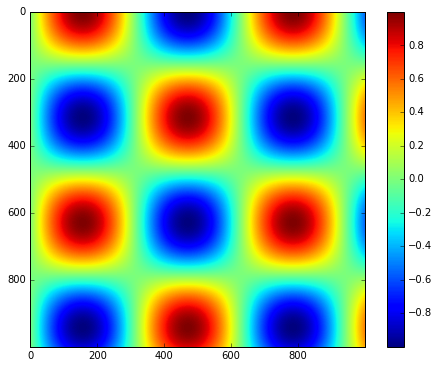

In [44]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.figure(figsize=(8, 6)) # изменим размер фигуры для нормального отображения
plt.imshow(I)
plt.colorbar();

Далее мы рассмотрим несколько идей по пользовательской настройке шкалы цветов и эффективному их использованию в разных ситуациях.

Задать карту цветов можно с помощью аргумента cmap функции создания визуализации:

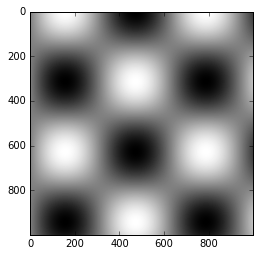

In [17]:
plt.imshow(I, cmap='gray');

Все доступные для использования карты цветов содержатся в пространстве имен plt.cm. Вы можете получить полный список встроенных опций с помощью TAB-автодополнения в оболочке IPython:

In [20]:
# plt.cm.<TAB>

<module 'matplotlib.cm' from 'c:\\users\\rusancovs\\appdata\\local\\programs\\python\\python37-32\\lib\\site-packages\\matplotlib\\cm.py'>

Но возможность выбора карты цветов — лишь первый шаг, гораздо важнее выбрать среди имеющихся вариантов! Выбор оказывается гораздо более тонким, чем вы могли бы ожидать.

## Выбор карты цветов

Всестороннее рассмотрение вопроса выбора цветов в визуализации выходит за пределы данной книги, но по этому вопросу вы можете почитать статью Ten Simple Rules for Better Figures («Десять простых правил для улучшения рисунков», http://bit.ly/2fDJn9J). Онлайн-документация библиотеки Matplotlib также содержит интересную информацию по вопросу выбора карты цветов (http://matplotlib.org/1.4.1/users/colormaps.html).

Вам следует знать, что существует три различные категории карт цветов:
- последовательные карты цветов. Состоят из одной непрерывной последовательности цветов (например, binary или viridis);
- дивергентные карты цветов. Обычно содержат два хорошо различимых цвета, отражающих положительные и отрицательные отклонения от среднего значения (например, RdBu или PuOr);
- качественные карты цветов. В них цвета смешиваются без какого-либо четкого порядка (например, rainbow или jet).

Карта цветов jet, использовавшаяся по умолчанию в библиотеке Matplotlib до версии 2.0, представляет собой пример качественной карты цветов. Ее выбор в качестве карты цветов по умолчанию был весьма неудачен, поскольку качественные карты цветов плохо подходят для отражения количественных данных: обычно они не отражают равномерного роста яркости при продвижении по шкале.
Продемонстрировать это можно путем преобразования шкалы цветов jet в черно-белое представление:

In [23]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Возвращает версию в оттенках серого заданной карты цветов"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # Преобразуем RGBA в воспринимаемую глазом светимость серого цвета
    # ср. http://alienryderflex.com/hsp.html
    
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + '_gray', colors, cmap.N)

def view_colormap(cmap):
    """Рисует карту цветов в эквивалентных оттенках серого"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

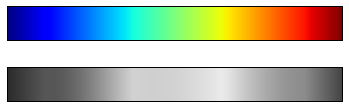

In [24]:
view_colormap('jet')

Отметим яркие полосы в ахроматическом изображении. Даже в полном цвете эта неравномерная яркость означает, что определенные части диапазона цветов будут притягивать внимание, что потенциально приведет к акцентированию несущественных
частей набора данных. Лучше применять такие карты цветов, как viridis (используется по умолчанию, начиная с версии 2.0 библиотеки Matplotlib), специально сконструированные для равномерного изменения яркости по диапазону. Таким образом, они не только согласуются с нашим цветовым восприятием, но и преобразуются для целей печати в оттенках серого:

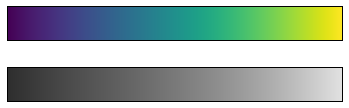

In [25]:
view_colormap('viridis')

Если вы предпочитаете радужные цветовые схемы, хорошим вариантом для непрерывных данных будет карта цветов cubehelix:

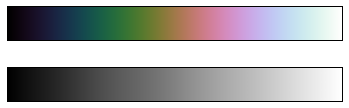

In [26]:
view_colormap('cubehelix')

В других случаях, например для отображения положительных и отрицательных отклонений от среднего значения, могут оказаться удобны такие двуцветные карты шкалы цветов, как RdBu (сокращение от Red — Blue — «красный — синий»). Однако, как вы можете видеть на рис. 4.54, такая информация будет потеряна при переходе к оттенкам серого!

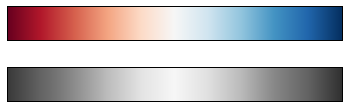

In [27]:
view_colormap('RdBu')

Далее мы увидим примеры использования некоторых из этих карт цветов.
В библиотеке Matplotlib существует множество карт цветов, для просмотра их списка вы можете воспользоваться оболочкой IPython для просмотра содержимого подмодуля plt.cm. Более принципиальный подход к использованию цветов в языке Python можно найти в инструментах и документации по библиотеке Seaborn.

## Ограничения и расширенные возможности по использованию цветов

Библиотека Matplotlib предоставляет возможность разнообразных пользовательских настроек шкал цветов. Сами по себе шкалы цветов — просто экземпляры класса plt.Axes, поэтому для них можно использовать все уже изученные нами трюки, связанные с форматированием осей координат и делений на них. Шкалы цветов обладают достаточной гибкостью: например, можно сузить границы диапазона цветов, обозначив выходящие за пределы этого диапазона значения с помощью треугольных стрелок вверху и внизу путем задания значения свойства extend. Это может оказаться удобно, например, при выводе зашумленного изображения:

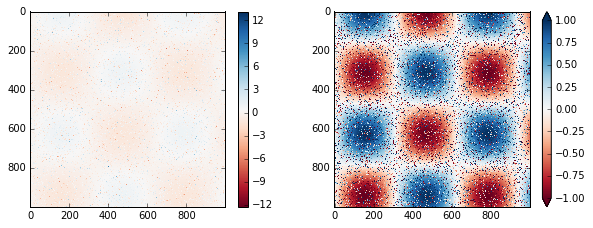

In [38]:
# создаем шут с размером 1% пикселов изображения
speckless = (np.random.random(I.shape) < 0.01)
I[speckless] = np.random.normal(0, 3, np.count_nonzero(speckless))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

Обратите внимание, что на левом рисунке зашумленные пикселы влияют на пределы диапазона цветов, по этой причине диапазон шума делает совершенно неразличимым интересующий нас паттерн. На правом рисунке мы задаем пределы диапазона цветов вручную и добавляем стрелки, указывающие на значения, выходящие за эти пределы. В результате мы получаем намного более удобную визуализацию наших данных.

## Дискретные шкалы цветов

Карты цветов по умолчанию непрерывны, но иногда нужно обеспечить отражение дискретных значений. Простейший способ добиться этого — воспользоваться функцией plt.cm.get_cmap(), передав в нее название подходящей карты цветов вместе с нужным количеством диапазонов:

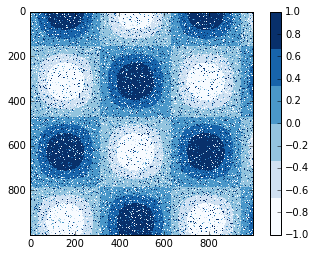

In [42]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

Использовать дискретный вариант карты цветов можно совершенно так же, как и любую другую карту цветов.

## Пример: рукописные цифры

В качестве примера рассмотрим интересную визуализацию данных с рукописными цифрами. Они включены в библиотеку Scikit-Learn и состоят почти из 2000 миниатюр размером 8 × 8 с рукописными цифрами.

Начнем со скачивания содержащих цифры данных и визуализации нескольких примеров изображений с помощью функции plt.imshow():

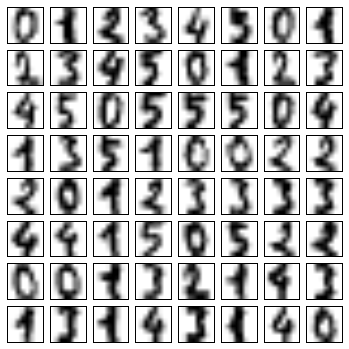

In [48]:
# Загружаем изображения цифр от 0 до 5 и визуализируем некоторые из них
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

В силу того что каждая цифра определяется оттенком ее 64 пикселов, можно считать ее точкой в 64-мерном пространстве: каждое измерение отражает яркость одного пиксела. Однако визуализация зависимостей в настолько многомерном пространстве представляет собой исключительно непростую задачу. Один из способов ее решения — воспользоваться каким-либо из методов понижения размерности (dimensionality reduction), например обучением на базе многообразий (manifold learning) с целью снижения размерности данных с сохранением интересующих нас зависимостей. Понижение размерности — пример машинного обучения без учителя (unsupervised machine learning). Мы обсудим его подробнее в разделе «Что такое машинное обучение» главы 5.

Рассмотрим отображение с помощью обучения на базе многообразий наших данных на двумерное пространство (см. подробности в разделе «Заглянем глубже: обучение на базе многообразий» главы 5):

In [49]:
# отображаем цифры на двумерное пространство с помощью функции IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

Воспользуемся нашей дискретной картой цветов для просмотра результатов, задав параметры ticks и clim для улучшения внешнего вида итоговой карты цветов:

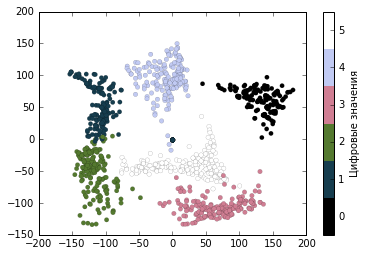

In [50]:
# выводим результаты на график
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='Цифровые значения')
plt.clim(-0.5, 5.5)

Это отображение также предоставляет нам полезную информацию о зависимостях внутри набора данных. Например, диапазоны цифр 5 и 3 в проекции практически пересекаются, то есть некоторые рукописные пятерки и тройки отличить друг от друга довольно непросто, и, следовательно, выше вероятность, что автоматический алгоритм классификации будет их путать. Другие значения, например 0 и 1, разделены более отчетливо, значит, вероятность путаницы намного меньше. Это наблюдение хорошо согласуется с нашей интуицией, поскольку цифры 5 и 3 больше похожи друга на друга, чем 0 и 1.
Мы вернемся к обучению на базе многообразий и классификации цифр в главе 5.